In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Assuming you're using RandomForestClassifier, you can change it to the appropriate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [9]:
df=pd.read_excel("D:\DATA_SET\kerala_rainfall.xlsx")

Dataset Description: 

In [10]:
df.shape

(118, 16)

In [42]:
df.columns.unique()

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

Data Processing

In [43]:
df.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [44]:
#1. Seasonal Features
# Extracting seasonal information from the month columns
for month in range(1, 13):
    df[f'SEASON_{month}'] = df.iloc[:, month].apply(lambda x: 1 if x > df.iloc[:, month].mean() else 0)

In [45]:
df[f'SEASON_{month}']

0      1
1      0
2      0
3      0
4      0
      ..
113    0
114    1
115    0
116    0
117    0
Name: SEASON_12, Length: 118, dtype: int64

In [46]:
# 2. Total Rainfall
# Calculating the total rainfall for each year
df['TOTAL_RAINFALL'] = df.iloc[:, 2:14].sum(axis=1)

In [47]:
df['TOTAL_RAINFALL']

0      3248.6
1      3326.5
2      3271.4
3      3129.6
4      2741.7
        ...  
113    3046.6
114    2600.7
115    2179.6
116    2117.1
117    4473.0
Name: TOTAL_RAINFALL, Length: 118, dtype: float64

In [48]:
# Calculate the average monthly rainfall
df['AVG_MONTHLY_RAINFALL'] = df.iloc[:, 2:14].mean(axis=1)

In [49]:
df['AVG_MONTHLY_RAINFALL']

0      270.716667
1      277.208333
2      272.616667
3      260.800000
4      228.475000
          ...    
113    253.883333
114    216.725000
115    181.633333
116    176.425000
117    372.750000
Name: AVG_MONTHLY_RAINFALL, Length: 118, dtype: float64

In [50]:
print(df[['YEAR', 'AVG_MONTHLY_RAINFALL']])

     YEAR  AVG_MONTHLY_RAINFALL
0    1901            270.716667
1    1902            277.208333
2    1903            272.616667
3    1904            260.800000
4    1905            228.475000
..    ...                   ...
113  2014            253.883333
114  2015            216.725000
115  2016            181.633333
116  2017            176.425000
117  2018            372.750000

[118 rows x 2 columns]


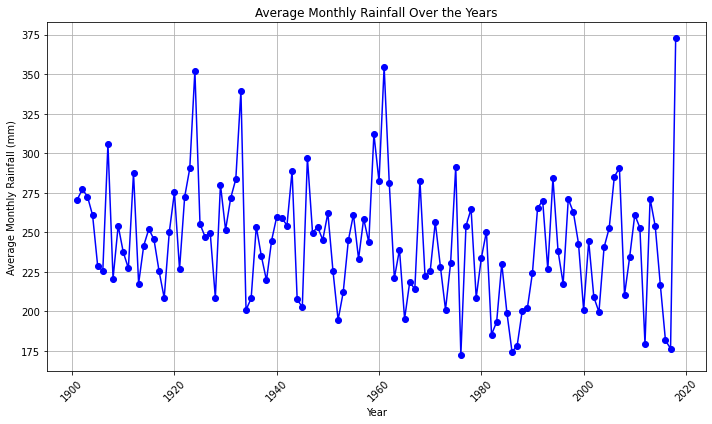

In [19]:

plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df['AVG_MONTHLY_RAINFALL'], marker='o', color='b', linestyle='-')
plt.title('Average Monthly Rainfall Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Monthly Rainfall (mm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


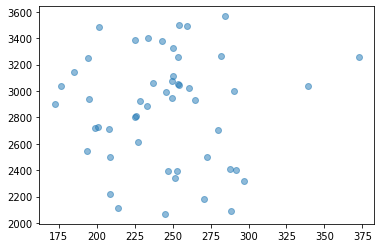

In [51]:
# Plot the scatter plot with a sample of data points
sample_size = 50  # Adjust the sample size as needed
plt.scatter(df['AVG_MONTHLY_RAINFALL'].sample(sample_size), df['TOTAL_RAINFALL'].sample(sample_size), alpha=0.5)


In [52]:
 #Calculate average and minimum values
avg_avg_monthly = df['AVG_MONTHLY_RAINFALL'].mean()
avg_annual = df['TOTAL_RAINFALL'].mean()
min_avg_monthly = df['AVG_MONTHLY_RAINFALL'].min()
min_annual = df['TOTAL_RAINFALL'].min()


In [53]:
# Print the calculated values
print("Average Monthly Rainfall (mm) - Mean:", avg_avg_monthly)
print("Total Annual Rainfall (mm) - Mean:", avg_annual)
print("Average Monthly Rainfall (mm) - Minimum:", min_avg_monthly)
print("Total Annual Rainfall (mm) - Minimum:", min_annual)

Average Monthly Rainfall (mm) - Mean: 243.78679378531078
Total Annual Rainfall (mm) - Mean: 2925.4415254237283
Average Monthly Rainfall (mm) - Minimum: 172.4
Total Annual Rainfall (mm) - Minimum: 2068.8


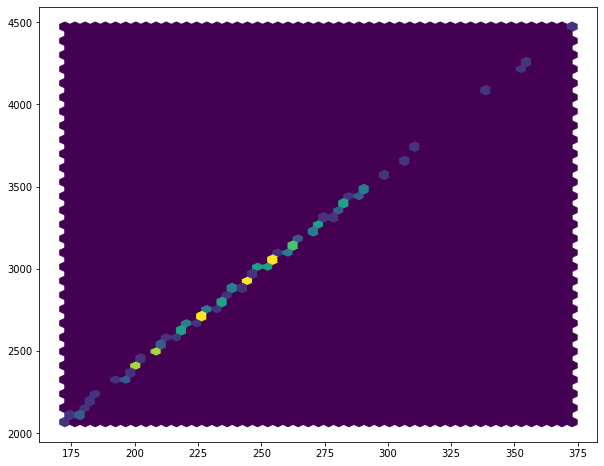

In [23]:
# Plot the hexbin plot
plt.figure(figsize=(10, 8))
plt.hexbin(df['AVG_MONTHLY_RAINFALL'], df['TOTAL_RAINFALL'], gridsize=50, cmap='viridis')


In [54]:
# 1. Seasonal Features
df['Monsoon_Rainfall'] = df[['JUN', 'JUL', 'AUG', 'SEP']].mean(axis=1)
df['Dry_Season_Rainfall'] = df[['DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY']].mean(axis=1)


In [55]:
# 2. Extreme Events
threshold = 200  # Define your threshold for extreme rainfall
df['Extreme_Rainfall'] = (df.iloc[:, 3:15] > threshold).any(axis=1).astype(int)


In [56]:
df['Extreme_Rainfall'] 

0      1
1      1
2      1
3      1
4      1
      ..
113    1
114    1
115    1
116    1
117    1
Name: Extreme_Rainfall, Length: 118, dtype: int32

In [57]:
# 3. Cumulative Rainfall
df['Cumulative_Rainfall_3Months'] = df.iloc[:, 3:6].sum(axis=1)
df['Cumulative_Rainfall_6Months'] = df.iloc[:, 3:9].sum(axis=1)
df['Cumulative_Rainfall_12Months'] = df.iloc[:, 3:15].sum(axis=1)


In [58]:
# 4. Rainfall Intensity
df['Max_Monthly_Rainfall'] = df.iloc[:, 3:15].max(axis=1)
df['Heavy_Rainfall_Months'] = (df.iloc[:, 3:15] > 150).sum(axis=1)


In [59]:
# 5. Temporal Aggregations (Bi-annual)
df['Biannual_Avg_Rainfall_1'] = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN']].mean(axis=1)
df['Biannual_Avg_Rainfall_2'] = df[['JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean(axis=1)


In [30]:
# Print the modified dataset
print(df.head())

  SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0      KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1      KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2      KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3      KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4      KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   

   ...  Monsoon_Rainfall  Dry_Season_Rainfall  Extreme_Rainfall  \
0  ...           530.700            84.683333                 1   
1  ...           600.825            67.750000                 1   
2  ...           585.775            69.533333                 1   
3  ...           599.550            61.566667                 1   
4  ...           470.375            67.050000                 1   

   Cumulative_Rainfall_3Months  Cumulative_Rainfall_6Months  \
0                        256.3                       1998.6   
1 

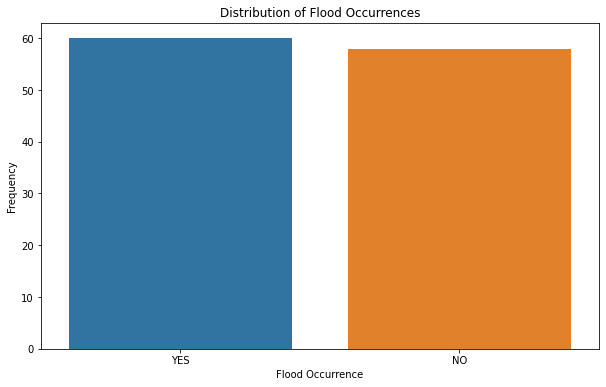

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FLOODS')
plt.title('Distribution of Flood Occurrences')
plt.xlabel('Flood Occurrence')
plt.ylabel('Frequency')
plt.show()


In [61]:
df.dtypes

SUBDIVISION                      object
YEAR                              int64
JAN                             float64
FEB                             float64
MAR                             float64
APR                             float64
MAY                             float64
JUN                             float64
JUL                             float64
AUG                             float64
SEP                             float64
OCT                             float64
NOV                             float64
DEC                             float64
 ANNUAL RAINFALL                float64
FLOODS                           object
SEASON_1                          int64
SEASON_2                          int64
SEASON_3                          int64
SEASON_4                          int64
SEASON_5                          int64
SEASON_6                          int64
SEASON_7                          int64
SEASON_8                          int64
SEASON_9                          int64


In [62]:
df.shape

(118, 40)

In [63]:
df.drop(columns=['SUBDIVISION'], inplace=True)

In [80]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,...,Monsoon_Rainfall,Dry_Season_Rainfall,Extreme_Rainfall,Cumulative_Rainfall_3Months,Cumulative_Rainfall_6Months,Cumulative_Rainfall_12Months,Max_Monthly_Rainfall,Heavy_Rainfall_Months,Biannual_Avg_Rainfall_1,Biannual_Avg_Rainfall_2
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,...,530.700,84.683333,1,256.3,1998.6,6468.5,3248.6,9,214.050000,327.383333
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,...,600.825,67.750000,1,143.8,1874.2,6646.4,3326.6,7,112.650000,441.766667
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,...,585.775,69.533333,1,105.3,1936.1,6539.4,3271.2,8,152.800000,392.433333
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,...,599.550,61.566667,1,106.7,2166.1,6235.6,3129.7,7,244.050000,277.550000
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,...,470.375,67.050000,1,137.6,1771.6,5482.1,2741.6,7,208.716667,248.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,...,541.225,71.116667,1,123.9,1507.1,6088.4,3046.4,7,138.983333,368.783333
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,...,378.675,92.383333,1,270.0,1441.4,5198.2,2600.6,9,173.083333,260.366667
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,...,358.300,65.850000,1,182.7,1303.6,4353.8,2176.6,7,148.950000,214.316667
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,...,389.850,45.466667,1,59.3,1050.9,4232.3,2117.1,7,122.200000,230.650000


In [ ]:
# Print the converted 'FLOODS' column
print("Converted 'FLOODS' column:")
print(df['FLOODS'])

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
df

In [74]:
# Encode categorical variable 'FLOODS' to numerical values
label_encoder = LabelEncoder()
df['FLOODS'] = label_encoder.fit_transform(df['FLOODS'])


In [87]:
# Calculating the total rainfall for each year
df['TOTAL_RAINFALL'] = df.iloc[:, 2:14].sum(axis=1)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df.drop([ 'YEAR', 'TOTAL_RAINFALL' ], axis=1)  # Features
y = df['FLOODS']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


NameError: name 'predicted_rainfall' is not defined

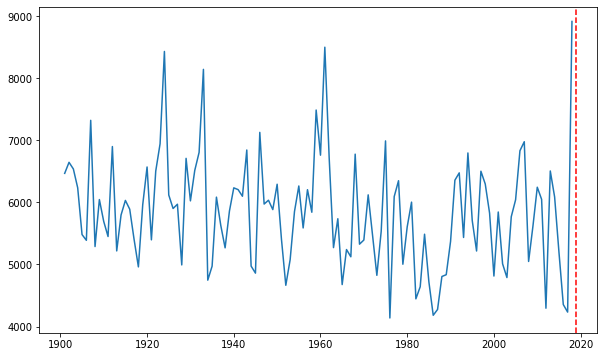

In [100]:
# Plot the predicted rainfall
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df['TOTAL_RAINFALL'], label='Actual Rainfall')
plt.axvline(x=2019, color='r', linestyle='--', label='Year 2019')
plt.scatter(2019, predicted_rainfall[0], color='g', label='Predicted Rainfall')
plt.title('Actual vs. Predicted Rainfall for the Year 2019')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()